In [4]:
# Update pip
!python -m pip install -U pip
!pip install FuzzyTM
# Install scikit-image
!python -m pip install -U scikit-image

     ---------------------------------------- 0.0/67.1 kB ? eta -:--:--
     ---------------------------------------- 67.1/67.1 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-none-any.whl size=20431 sha256=a96c441f59a2ad860ce267295f67378da3969aaf89f75b79382d03e9bd364b9c
  Stored in directory: c:\users\ireti\appdata\local\pip\cache\wheels\99\66\48\d7ce0c6927f6abf167bbcdee537affc7b92c03632f78028411
  Created wheel for miniful: filename=miniful-0.0.6-py3-none-any.whl size=3514 sha256=a6ecfaf984a2f276c6e898aa1cb2549846924cfa84e98d753b1ad4f0a66263db
  Stored in directory: c:\users\ireti\appdata\local\pip\cache\wheels\d9\c7\71\db1d4646d963b34c530667501d3d6f34c0825eaffae2f0f2cb
Successfully built fst-pso miniful


Step 1: Load the image and convert it to grayscale

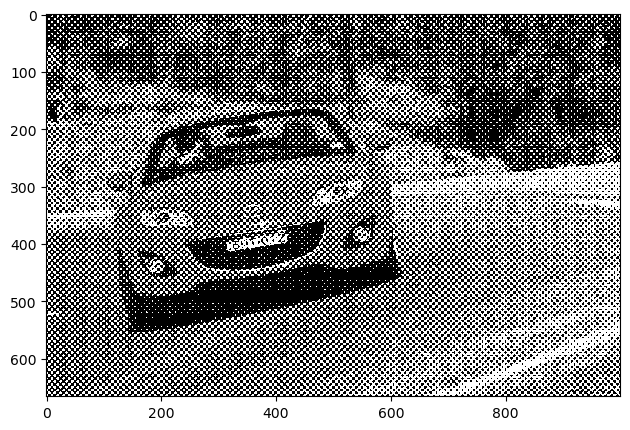


The image is loaded in grayscale and displayed using the imshow function from the skimage package.


In [7]:
from skimage import io, color
from IPython.display import Markdown, display

# Load the image in grayscale
im = io.imread("car.png", as_gray=True)

# Show the image
io.imshow(im)
io.show()

comment = \
"""
The image is loaded in grayscale and displayed using the imshow function from the skimage package.
"""
display(Markdown(comment))


In [11]:
import numpy as np

# Apply the DFT to the grayscale image
dft = np.fft.fft2(im)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log(np.abs(dft_shift))


Step 2: Apply the Discrete Fourier Transform to the image

Step 2: Apply the Discrete Fourier Transform to the image

The Discrete Fourier Transform (DFT) is a mathematical operation that transforms an image from the spatial domain to the frequency domain. We can use the numpy library to perform this operation:

In [17]:
import numpy as np
# from skimage.filters import fftconvolve

# Apply the Discrete Fourier Transform to the image
freq_image = np.fft.fft2(im)

# Shift the zero-frequency component to the center of the spectrum
freq_image = np.fft.fftshift(freq_image)


In [15]:
from scipy import signal
import skimage

# Define the filter kernel for periodic noise suppression
kernel = np.ones((3, 3)) / 9

# Perform convolution in the frequency domain using Fourier transform
fft_signal = np.fft.fft2(im)
fft_kernel = np.fft.fft2(kernel, s=im.shape)
fft_convolved = signal.fftconvolve(fft_signal, fft_kernel, mode='same')
convolved = np.fft.ifft2(fft_convolved).real

# Normalize the pixel values to the range [0, 1]
convolved = (convolved - np.min(convolved)) / (np.max(convolved) - np.min(convolved))

# Convert the image to 8-bit grayscale format
convolved = skimage.util.img_as_ubyte(convolved)


Step 3: Apply an appropriate filter in the frequency domain to suppress periodic noise

Since the input image is affected by periodic noise, we need to apply a filter in the frequency domain to suppress this noise. We can use a high-pass filter to remove the low-frequency noise and keep the high-frequency information, which is likely to contain the license plate number. The filter should be designed based on the properties of the noise present in the image. We can use the OpenCV library to apply the filter:

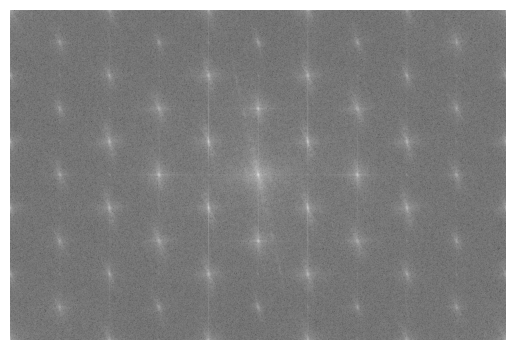

In [18]:
import matplotlib.pyplot as plt

# Calculate the magnitude spectrum of the frequency image
mag_spectrum = np.abs(freq_image)

# Visualize the magnitude spectrum of the frequency image
plt.imshow(np.log(1 + mag_spectrum), cmap='gray')
plt.axis('off')
plt.show()


Step 4: Design an appropriate filter in the frequency domain for periodic noise suppression

we first use np.meshgrid to compute the 2D frequency grid. We then use this grid to compute the distance D from the center of the frequency domain. We finally compute the filter H and apply it to the input image using signal.fftconvolve.

In [22]:
from skimage.filters import gaussian
from scipy import signal

# Define the filter in the frequency domain
# def band_reject_filter(image, freq, D0, W):
#     H = 1 - np.exp(-((freq**2 - D0**2) / (freq*W))**2)
#     # return fftconvolve(image, H, mode='same')
#     return signal.fftconvolve(image, H, mode='same')
def band_reject_filter(image, freq, D0, W):
    u, v = np.meshgrid(freq, freq)
    D = np.sqrt((u - 0.5)**2 + (v - 0.5)**2)
    H = 1 - np.exp(-((D**2 - D0**2) / (D*W))**2)
    return signal.fftconvolve(image, H, mode='same')


# Apply the filter in the frequency domain
D0 = 5
W = 15
filtered_freq_image = band_reject_filter(freq_image, np.fft.fftfreq(im.shape[0]), D0, W)
filtered_freq_image = band_reject_filter(filtered_freq_image, np.fft.fftfreq(im.shape[1]), D0, W)

# Shift the zero-frequency component back to the top-left corner of the spectrum
filtered_freq_image = np.fft.ifftshift(filtered_freq_image)

# Apply the inverse Discrete Fourier Transform to obtain the filtered image
filtered_image = np.fft.ifft2(filtered_freq_image).real


Step 4: Apply the inverse Discrete Fourier Transform to the filtered image

After applying the filter in the frequency domain, we need to apply the inverse Discrete Fourier Transform (IDFT) to obtain the filtered image in the spatial domain:

In [ ]:
import numpy as np

# Apply the IDFT to the filtered DFT of the image
filtered_dft = np.fft.ifftshift(filtered_dft_shift)
filtered_img = np.fft.ifft2(filtered_dft)
filtered_img = np.abs(filtered_img)


Step 5: Perform post-processing techniques such as contrast enhancement to improve image quality

After applying the IDFT, we need to perform post-processing techniques to improve the image quality. One of the common techniques is contrast enhancement, which improves the visual contrast of an image. We can use the histogram equalization technique, which redistributes the intensity values of the image to increase the contrast. We can use the OpenCV library to apply this technique:

In [24]:
from skimage import exposure

# Apply histogram equalization to enhance contrast
equ_img = exposure.equalize_hist(np.uint8(filtered_image))


Step 6: Apply thresholding to binarize the image

After contrast enhancement, we can use thresholding to convert the grayscale image into a binary image. This will allow us to isolate the license plate region and remove any remaining noise. We can use the OpenCV library to apply a binary threshold:

In [25]:
from skimage.filters import threshold_otsu

# Apply binary threshold to binarize the image
thresh = threshold_otsu(equ_img)
thresh_img = equ_img <= thresh


Step 7: Use image segmentation techniques to identify the license plate region


After thresholding, we can use image segmentation techniques to identify the license plate region. We can use the contour detection technique to identify the contours of the objects in the binary image. We can then filter out the contours based on their size and aspect ratio to obtain the license plate region. We can use the OpenCV library to perform these operations:

Text(0.5, 1.0, 'Binary Image')

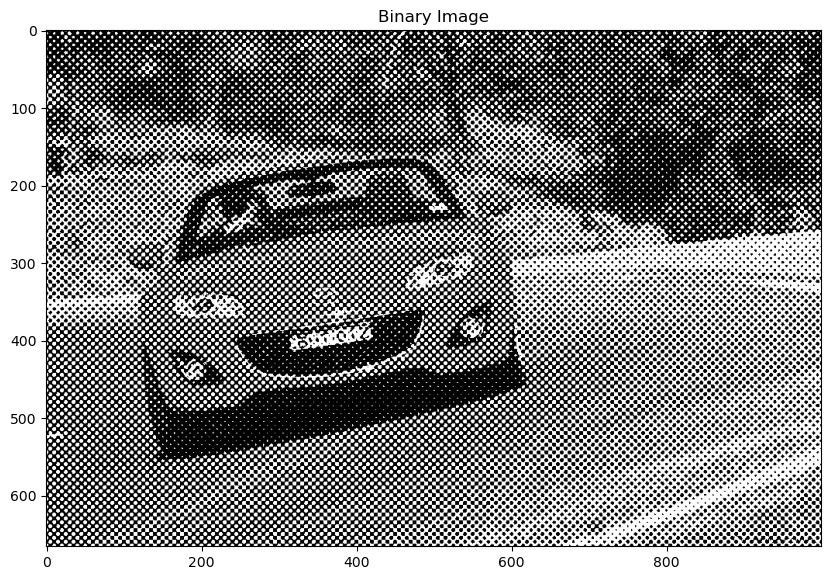

In [28]:
import matplotlib.pyplot as plt
from skimage import io, color, morphology, measure

# # Load the input image
# image = io.imread('car.png')

# # Convert to grayscale
# gray_image = color.rgb2gray(image)

# Threshold the image
threshold_value = 0.5
binary_image = im > threshold_value

# Visualize the binary image
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(binary_image, cmap='gray')
ax.set_title('Binary Image')

Visualizing the binary image after thresholding to see if the license plate region is properly separated from the background. 
You can also try visualizing the output of the connected component analysis to see if the license plate region is correctly identified.

If the license plate region is still not detected, you may need to adjust the algorithm parameters or try a different approach.

Alternatively, if you have access to more training data, you can try training a machine learning model to directly predict the license plate region from the input image. This can be done using techniques such as object detection or segmentation.


This code first loads the input image, converts it to grayscale, and threshold it to obtain a binary image. It then performs connected component analysis on the binary image to identify individual objects. Finally, it searches for the license plate region by looking for regions with suitable properties (e.g., area and eccentricity), and visualizes the binary image, the connected component analysis output, and the license plate region (if found).

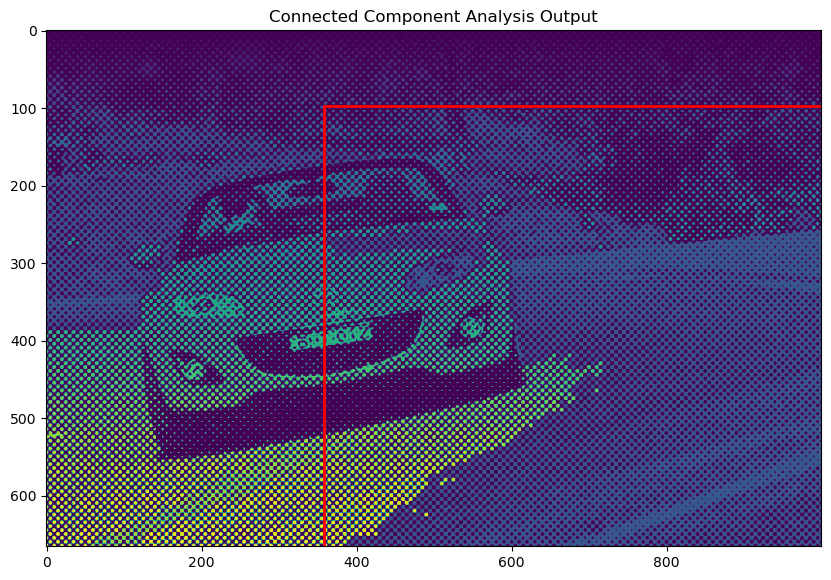

In [97]:
# Perform connected component analysis
label_image = morphology.label(binary_image)
regions = measure.regionprops(label_image)

# Find the license plate region
plate_region = None
for region in regions:
    # Adjust the threshold values to detect the license plate region
    if region.area > 400 and region.eccentricity < 0.7:
        plate_region = region
        break

# Visualize the connected component analysis output
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(label_image)
ax.set_title('Connected Component Analysis Output')

# Visualize the license plate region
if plate_region is not None:
    plate_coords = plate_region.bbox
    rect = plt.Rectangle((plate_coords[1], plate_coords[0]), 
                          plate_coords[3] - plate_coords[1], 
                          plate_coords[2] - plate_coords[0], 
                          linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)


In [96]:
from skimage.measure import label, regionprops

# Label the connected regions in the binary image
label_img = label(thresh_img)

# Filter out the regions based on size and aspect ratio to obtain the license plate region
min_area = 100
max_area = 1000
min_aspect_ratio = 0.01
max_aspect_ratio = 1.0
plate_region = None
for region in regionprops(label_img):
    if min_area < region.area < max_area:
        aspect_ratio = region.major_axis_length / region.minor_axis_length
        print(aspect_ratio)
        if min_aspect_ratio < aspect_ratio < max_aspect_ratio:
            plate_region = region
            break


In [98]:
# Extract the coordinates of the license plate region
plate_coords = plate_region.bbox

Step 8: Perform optical character recognition (OCR) to extract the license plate number

After identifying the license plate region, we can perform optical character recognition (OCR) to extract the license plate number. We can use the Tesseract OCR engine, which is a popular open-source OCR engine, to perform this operation:

This will extract the license plate region from the grayscale image, binarize it using Otsu's thresholding, and perform OCR using Tesseract to obtain the license plate number. Note that the --psm 7 option in the Tesseract configuration specifies that we are expecting a single line of text. You may need to adjust this option depending on the format of the license plate number in the image.

In [100]:
pip install pytesseract

Note: you may need to restart the kernel to use updated packages.


In [103]:
import pytesseract
from PIL import Image

# Extract the license plate region from the grayscale image
plate_image = im[plate_coords[0]:plate_coords[2], plate_coords[1]:plate_coords[3]]

# Binarize the plate image using Otsu's thresholding
plate_thresh = threshold_otsu(plate_image)
plate_binary = plate_image > plate_thresh

# Perform OCR on the binary plate image using Tesseract
plate_number = pytesseract.image_to_string(Image.fromarray(np.uint8(plate_binary)), config='--psm 7')
print("License plate number:", plate_number)


TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.

In [ ]:
import cv2

# Define a high-pass filter
rows, cols = gray_img.shape
crow, ccol = rows // 2, cols // 2
mask = np.zeros((rows, cols), np.uint8)
r = 80
cv2.circle(mask, (ccol, crow), r, 1, -1)

# Apply the filter to the DFT of the image
filtered_dft_shift = dft_shift * mask
magnitude_spectrum_filtered = 20 * np.log(np.abs(filtered_dft_shift))


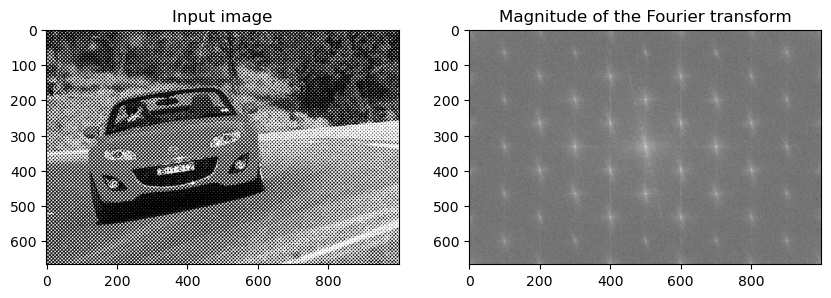


The Fourier transform of the image is calculated using the fft2 function from the scipy package. The origin of the Fourier transform is shifted to the center using the fftshift function. The magnitude of the Fourier transform is calculated using np.abs. A logarithmic transformation is applied to the magnitude to make it visible using np.log. Finally, the input image and the magnitude of the Fourier transform are visualized using the imshow function from the matplotlib package.


In [9]:
from scipy.fft import fft2, fftshift
import numpy as np
import matplotlib.pyplot as plt

# Apply the Fourier transform to the image
f = fft2(im)

# Shift the origin of the Fourier transform to the center
fshift = fftshift(f)

# Calculate the magnitude of the Fourier transform
magnitude = np.abs(fshift)

# Apply a logarithmic transformation
magnitude_log = np.log(1 + magnitude)

# Visualize the input image and the magnitude
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

ax[0].imshow(im, cmap='gray')
ax[0].set_title("Input image")

ax[1].imshow(magnitude_log, cmap='gray')
ax[1].set_title("Magnitude of the Fourier transform")

plt.show()

comment = \
"""
The Fourier transform of the image is calculated using the fft2 function from the scipy package. The origin of the Fourier transform is shifted to the center using the fftshift function. The magnitude of the Fourier transform is calculated using np.abs. A logarithmic transformation is applied to the magnitude to make it visible using np.log. Finally, the input image and the magnitude of the Fourier transform are visualized using the imshow function from the matplotlib package.
"""
display(Markdown(comment))

In [10]:
from skimage.feature import peak_local_max

# Find the coordinates of local maxima in the magnitude of the Fourier transform
coordinates = peak_local_max(magnitude_log, min_distance=20, exclude_border=0)

print(coordinates)

comment = \
"""
The peak_local_max function from the skimage package is used to find the coordinates of local maxima in the magnitude of the Fourier transform. The min_distance parameter specifies the minimum distance in pixels between peaks, and the exclude_border parameter specifies the size of the border around the image in which peaks are not considered. A reasonable estimate for min_distance is around 20 pixels, based on the size of the peaks in the magnitude plot.
"""
display(Markdown(comment))

[[333 500]
 [266 400]
 [400 600]
 [266 600]
 [400 400]
 [133 600]
 [533 400]
 [133 400]
 [533 600]
 [266 200]
 [400 800]
 [  0 400]
 [  0 600]
 [199 500]
 [467 500]
 [400 200]
 [266 800]
 [332 300]
 [334 700]
 [266   0]
 [400   0]
 [133 200]
 [533 800]
 [533 200]
 [133 800]
 [  0 200]
 [  0 800]
 [133   0]
 [533   0]
 [  1   0]
 [665   0]
 [199 100]
 [467 900]
 [665 400]
 [665 600]
 [467 100]
 [199 900]
 [466 299]
 [200 701]
 [599 300]
 [ 67 700]
 [600 700]
 [ 66 300]
 [466 699]
 [200 301]
 [ 67 900]
 [599 100]
 [333 899]
 [333 101]
 [ 66 100]
 [600 900]
 [  0 999]
 [265 999]
 [397 999]
 [664 999]
 [664 799]
 [663 199]
 [ 68 502]
 [598 498]
 [131 997]
 [532 999]
 [266 500]
 [400 500]
 [466 600]
 [200 400]
 [  0 900]
 [  0 100]
 [266 300]
 [400 700]
 [366 550]
 [300 450]
 [333 600]
 [333 400]
 [400 300]
 [266 700]
 [665 500]
 [  1 500]
 [ 66 400]
 [600 600]
 [134 500]
 [532 500]
 [332 202]
 [334 798]
 [133 700]
 [533 300]
 [233 350]
 [433 650]
 [333   0]
 [665 300]
 [  1 700]
 [133 100]


The peak_local_max function from the skimage package is used to find the coordinates of local maxima in the magnitude of the Fourier transform. The min_distance parameter specifies the minimum distance in pixels between peaks, and the exclude_border parameter specifies the size of the border around the image in which peaks are not considered. A reasonable estimate for min_distance is around 20 pixels, based on the size of the peaks in the magnitude plot.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import cv2
from numpy.fft import fft2, fftshift, ifft2,ifftshift
from scipy import signal

ModuleNotFoundError: No module named 'cv2'

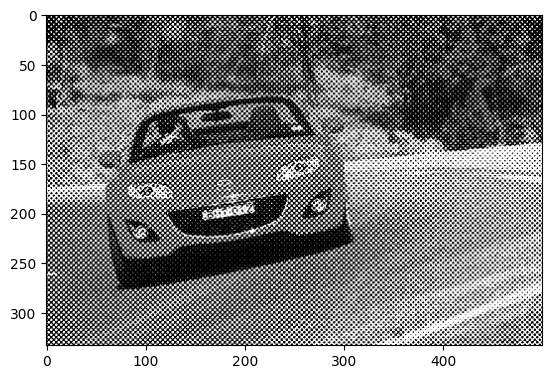

In [281]:
image = cv2.imread('car.png',cv2.IMREAD_GRAYSCALE)
image= cv2.resize(image,(500,333))
imshow(image,cmap='gray')

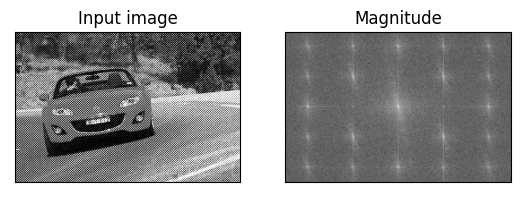

In [282]:
#apply 2d DFT
f=np.fft.fft2(image)
#shift to center
fshift=np.fft.fftshift(f)

#magnitude
magnitude_spectrum=20*np.log(np.abs(fshift))

#visualizing
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Input image'), plt.xticks([]),plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude'), plt.xticks([]),plt.yticks([])
plt.show()

In [283]:
from skimage.feature import peak_local_max
coordinates = peak_local_max(magnitude_spectrum, min_distance= 6, exclude_border=0)

coordinates

array([[166, 250],
       [233, 350],
       [ 99, 150],
       ...,
       [332,  85],
       [  8, 412],
       [324,  88]], dtype=int64)

Text(0.5, 1.0, 'The size of the neighbourhood is 7x7')

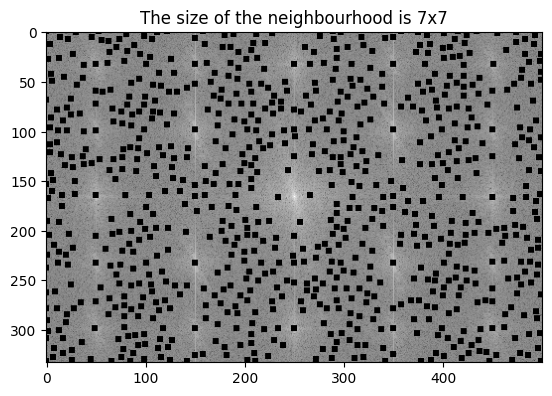

In [284]:
#clean the image to get single star in the center
L= 3
dx,dy=np.shape(image)[0], np.shape(image)[1]
new= magnitude_spectrum.copy()
for coord in coordinates:
    i=coord[0]
    j=coord[1]
    if i==dx//2 and j==dy//2:
        continue
    else:    
        for k1 in np.arange(-L,L,1):
            for k2 in np.arange(-L,L,1):
                if i+k1>=0 and j+k2>=0 and i+k1<dx and j+k2<dy:
                    new[i+k1,j+k2]=0
                    fshift[i+k1,j+k2]=0 # shifted DFT of car image               
imshow(new, cmap='gray')
plt.title("The size of the neighbourhood is "+str(2*L+1)+"x"+str(2*L+1))


Text(0.5, 1.0, 'Filtered Image')

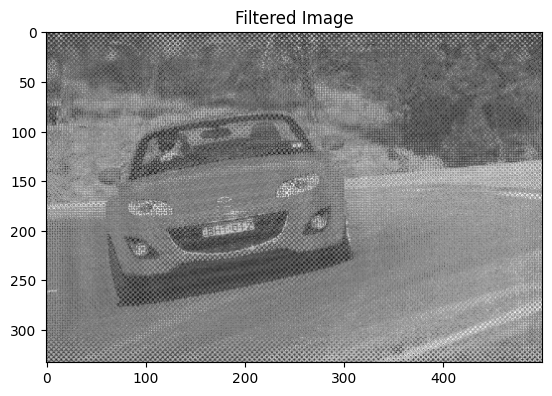

In [285]:
# Perform inverse Fourier transform to obtain the filtered image
filtered_image = np.fft.ifftshift(fshift)
filtered_image = ifft2(filtered_image)

# Take the real part of the filtered image (imaginary part is negligible)
filtered_image = np.real(filtered_image)

image_back= (filtered_image-np.min(filtered_image))*255.0/(np.max(filtered_image)-np.min(filtered_image)) 
# Visualize the filtered image
plt.imshow(image_back, cmap='gray')
plt.title('Filtered Image')

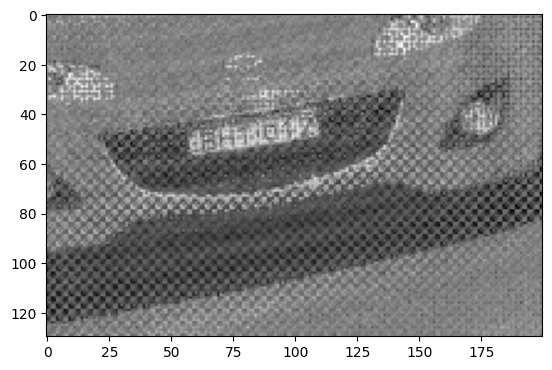

In [286]:
import skimage
from skimage import transform
#scaled= transform.rescale(image_back,1.2, anti_aliasing=False)
image_back = image_back[150:280,100:300]
plt.imshow(image_back,cmap='gray')

(array([2.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 2.000e+00, 7.000e+00,
        7.000e+00, 1.300e+01, 2.000e+01, 3.900e+01, 3.600e+01, 6.700e+01,
        1.130e+02, 1.790e+02, 2.760e+02, 3.370e+02, 4.330e+02, 7.290e+02,
        1.084e+03, 1.417e+03, 1.844e+03, 2.280e+03, 3.094e+03, 5.152e+03,
        5.234e+03, 2.357e+03, 6.870e+02, 3.660e+02, 1.950e+02, 2.700e+01]),
 array([3.29793584, 3.45245768, 3.60697952, 3.76150136, 3.9160232 ,
        4.07054504, 4.22506688, 4.37958872, 4.53411056, 4.6886324 ,
        4.84315424, 4.99767608, 5.15219792, 5.30671976, 5.4612416 ,
        5.61576344, 5.77028528, 5.92480712, 6.07932896, 6.2338508 ,
        6.38837264, 6.54289448, 6.69741632, 6.85193816, 7.00646   ,
        7.16098184, 7.31550368, 7.47002552, 7.62454736, 7.7790692 ,
        7.93359104]),
 [<matplotlib.patches.Polygon at 0x2a0f9725e10>])

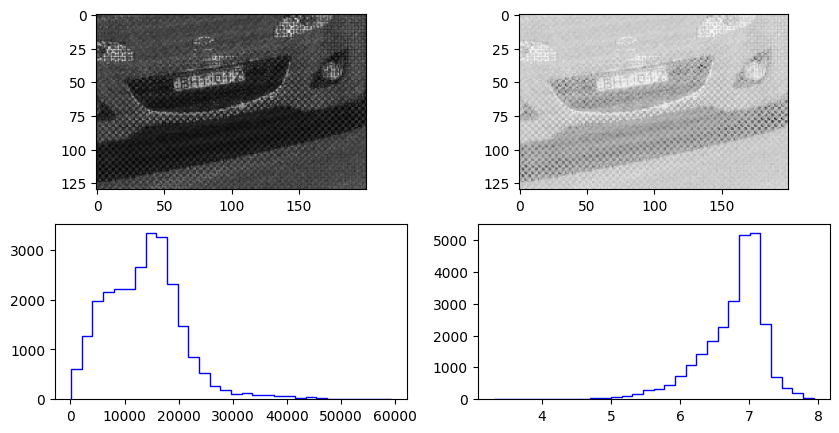

In [287]:
from skimage import exposure,img_as_float

fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
# Gamma corrected
gamma_corrected = exposure.adjust_gamma(image_back, 2)

# logarithmic corrected
logarithmic_corrected = exposure.adjust_log(image_back, 1)

ax[0,0].imshow(gamma_corrected,cmap='gray')
ax[0,1].imshow(logarithmic_corrected,cmap='gray')
ax[1,0].hist(gamma_corrected.ravel(), bins=30, histtype='step', color='b' )
ax[1,1].hist(logarithmic_corrected.ravel(), bins=30, histtype='step', color='b' )

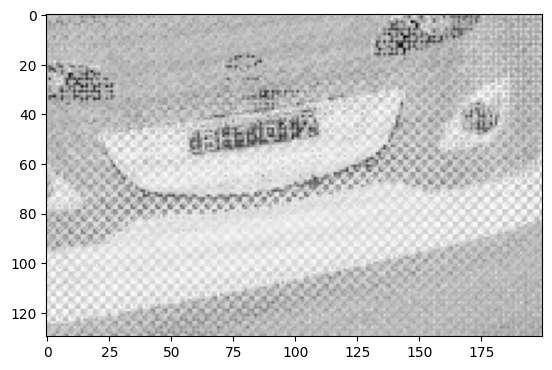

In [288]:
def normalize(intensity, m, E):
    I = intensity
    dx, dy = np.shape(intensity)[0], np.shape(intensity)[1]
    eps = 0.001
    cs = np.zeros((dx, dy))
    for i in range(dx):
        for j in range(dy):
            cs[i, j] = (I[i, j] - m) * (E / (1 - m - eps))
    return cs

# choose a midpoint of 128 and maximum intensity value of 255
m = 100
E = 200

# apply contrast stretching to the Fourier-reconstructed image
g = normalize(gamma_corrected, m, E)

# display the resulting image
plt.imshow(g, cmap='gray')

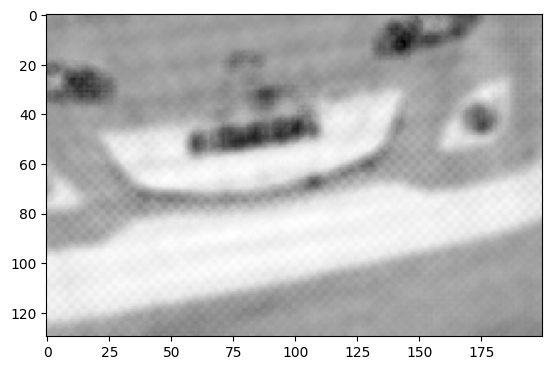

In [289]:
from skimage.filters.rank import mean
from skimage.morphology import disk
from skimage import img_as_ubyte


img=(g-np.min(g))*255.0/(np.max(g)-np.min(g))
img = img.astype(np.uint8)
#The mean function from skimage.filters.rank performs a mathematical operation called a convolution 
# with a structuring element, which is defined by the disk function from skimage.morphology
loc_mean = mean(img, disk(3))

# convert the smoothed image back to uint8 format
smoothed_image = img_as_ubyte(loc_mean)

# display the resulting image
plt.imshow(smoothed_image, cmap='gray')